# Importing Necessary Librabries


## Importing Basic Liraries

In [138]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## importing Sklearn Libraries

# Part 1: Data Preprocessing

1. Load the Dataset:

    - Load the dataset using pandas.
    - Display the first few rows to understand the structure.

2. Data Cleaning:

    - Check for missing values and handle them appropriately.
    - Ensure data types are correct for each column.
    - Handle any outliers if necessary.


In [139]:
# Loading the dataset using pandas
df = pd.read_csv('train.csv')
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


From info(), we can conclude that:
1. The total number of rows is 550068
2. Total number of column is 12
3. User_ID, Occupation, Marital_Status, Product_Category_1, and Purchase have data type as int64.
4. Product_Category_2, Product_Category_3 are float64
4. All other column are object in nature.


In [141]:
# checking shape of the dataframe

df.shape

(550068, 12)

In [142]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [143]:
# checking object columns
df.select_dtypes(include=['object']).columns


Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [144]:
# checking numberical columns
df.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Data type for columns looks correct. Lets not change for now

In [145]:
# checking general statistics
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [146]:
df.duplicated().sum()

0

In [147]:
# checking null values
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [148]:
#Percentage of null value in columns

df.isna().mean()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

The total percentage of null value in Product_Category_2 and Product_Categroy_3 are more than 30%. So, we cannot drop them 

In [149]:
#lets fill based on age and mode

df_age_p2 = df.groupby('Age')['Product_Category_2'].agg(pd.Series.mode)

In [150]:
for key in df_age_p2.index:
    df.loc[(df['Age']==key) & (df['Product_Category_2'].isnull()), 'Product_Category_2']=df_age_p2[key]

In [151]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [152]:
df_age_p3 =  df.groupby('Age')['Product_Category_3'].agg(pd.Series.mode)

In [153]:
for key in df_age_p3.index:
    df.loc[(df['Age']==key) & (df['Product_Category_3'].isnull()), 'Product_Category_3']= df_age_p3[key]

In [154]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

You can see now we do not have any null values

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


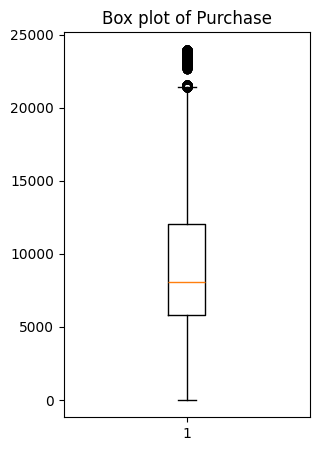

In [156]:
# Now, lets check outliers using box plot 


list_column = ['Purchase']
num_columns = len(list_column)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(7,5*num_rows))


for i,col in enumerate(list_column):
    plt.subplot(num_rows, 2,i+1)
    plt.boxplot(df[col])
    plt.title(f'Box plot of {col}')


In [157]:
df.shape

(550068, 12)

In [158]:
# checking outliers with IQR method
list_column = ['Purchase']


def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in list_column:
    outlier = detect_outliers_iqr(df, col)

    print(f'The shape of outlier for column {col} is {outlier.shape}')
    print(f'The percentage of outlier for column {col} is {(outlier.shape[0]/550068) * 100}')
    print("=============================================================")




The shape of outlier for column Purchase is (2677, 12)
The percentage of outlier for column Purchase is 0.4866671029763593


From boxplot and IQR methods, following are conclusion
 - Purchase have outliers



In [159]:
# # removing outlier for Product_Category_1
# outlier_1 = detect_outliers_iqr(df,'Product_Category_1')
# outlier_1.index
# df= df.drop(outlier_1.index)

In [160]:
# removing outlier for PPurchase
outlier_2 = detect_outliers_iqr(df,'Purchase')
outlier_2.index
df = df.drop(outlier_2.index)

In [161]:
df['Product_Category_3'].value_counts() 

Product_Category_3
16.0    413213
15.0     28013
14.0     18428
17.0     16695
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
6.0       4890
18.0      4629
4.0       1875
11.0      1805
10.0      1726
3.0        613
Name: count, dtype: int64

In [162]:
# #for Product_Category_3, lets replace outlier with median
# outlier_3 = detect_outliers_iqr(df, 'Product_Category_3')
# median_value = df['Product_Category_3'].median()
# df.loc[outlier_3.index, 'Product_Category_3'] = median_value

In [163]:
# # checking outliers again 

# for col in list_column:
#     outlier = detect_outliers_iqr(df, col)

#     print(f'The shape of outlier for column {col} is {outlier.shape}')
#     print(f'The percentage of outlier for column {col} is {(outlier.shape[0]/550068) * 100}')
#     print("=============================================================")

In [164]:
# chekking for categorical values
cat_col = df.select_dtypes(include=['object']).columns
print(cat_col)

for col in cat_col:
    print(f"\nValue counts for column '{col}':")
    print(df[col].value_counts())
    print("================================================")

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

Value counts for column 'Product_ID':
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00298842       1
P00314742       1
P00054442       1
P00091542       1
P00307242       1
Name: count, Length: 3631, dtype: int64

Value counts for column 'Gender':
Gender
M    412171
F    135220
Name: count, dtype: int64

Value counts for column 'Age':
Age
26-35    218661
36-45    109409
18-25     99334
46-50     45442
51-55     38191
55+       21322
0-17      15032
Name: count, dtype: int64

Value counts for column 'City_Category':
City_Category
B    230114
C    170241
A    147036
Name: count, dtype: int64

Value counts for column 'Stay_In_Current_City_Years':
Stay_In_Current_City_Years
1     192845
2     101384
3      94804
4+     84322
0      74036
Name: count, dtype: int64


In [165]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [166]:
# lets change name
df.rename(columns={'Product_Category_1':'Product_1','Product_Category_2':'Product_2','Product_Category_3':'Product_3','Marital_Status':'Maritial','Stay_In_Current_City_Years':'City'},inplace=True)
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,City,Maritial,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,4.0,16.0,1422


In [167]:
df['City'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [168]:
def cities(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

df['City']=df['City'].apply(cities)

In [169]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [170]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,City,Maritial,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,8.0,16.0,7969


In [171]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

# Part 2: Univariate Analysis
1. Distribution Analysis:
- Plot histograms for continuous variables (e.g., Purchase).
- Plot bar charts for categorical variables (e.g., Gender, Age).

2. Summary Statistics:
- Calculate and interpret summary statistics (mean, median, mode, standard deviation) for key variables.


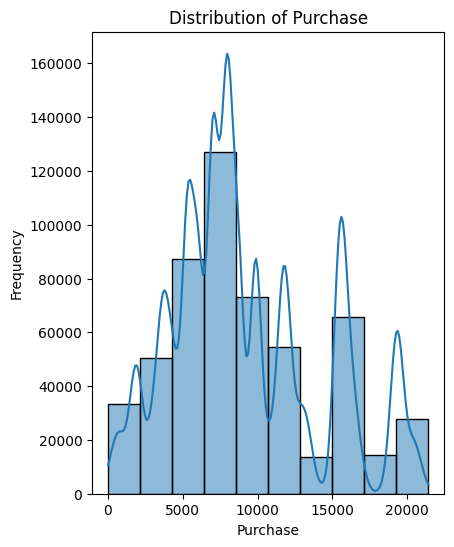

,User_ID,Occupation,City,Maritial,Product_1,Product_2,Product_3,Purchase
count,5.473910e+05,547391.000000,547391.000000,547391.000000,547391.000000,547391.000000,547391.000000,547391.000000
mean,1.003028e+06,8.074627,1.858476,0.409486,5.378945,9.207528,14.984612,9195.627195
std,1.727357e+03,6.521586,1.289437,0.491739,3.927383,4.314655,2.745617,4938.872953
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5721.000000
50%,1.003075e+06,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8038.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12019.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,21399.000000


In [172]:
# plotting histograms for continuous variables

list_column = ['Purchase']
num_columns = len(list_column)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(10,6*num_rows))


for i,col in enumerate(list_column):
    plt.subplot(num_rows, 2,i+1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.show()

#summary statics for continuous values
df.describe()

### Purchase Distribution:

- Insight:

The Purchase values range from 0 to about 20,000.
There are several peaks in the distribution, suggesting multiple modes (multimodal distribution), which might indicate distinct groups of purchase behaviors. The presence of multiple peaks suggests there might be different groups of customers with distinct buying patterns. For instance, some customers frequently make smaller purchases, while others tend to make larger ones.

- Recommendation:
Identify and target the distinct groups of buyers corresponding to the different peaks in the distribution. Tailor marketing campaigns to these segments to optimize engagement and sales.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13264\291484980.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13264\291484980.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13264\291484980.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,palette='viridis')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13264\291484980.py:10: FutureWarning: 

Passing `pal

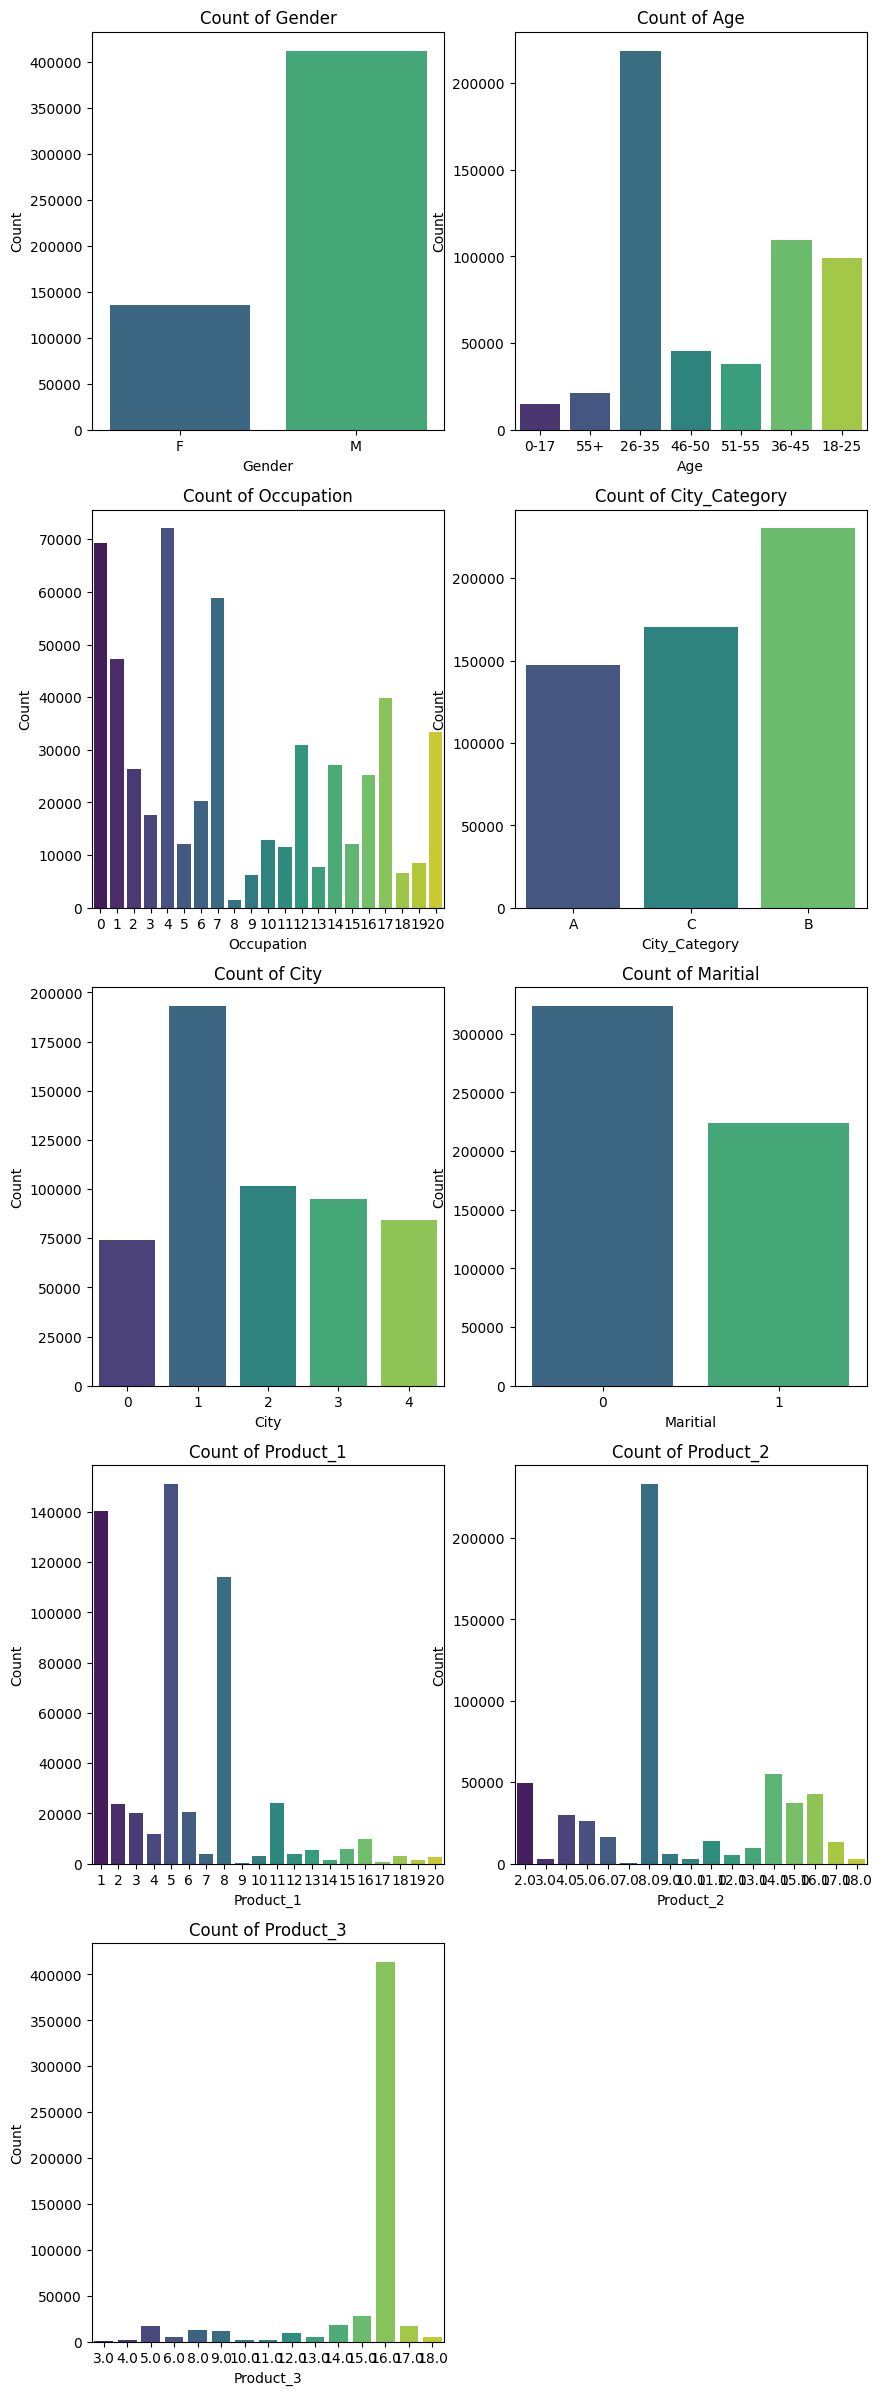

,Product_ID,Gender,Age,City_Category
count,547391,547391,547391,547391
unique,3631,2,7,3
top,P00265242,M,26-35,B
freq,1880,412171,218661,230114


In [186]:

list_column = ['Gender','Age','Occupation','City_Category','City','Maritial','Product_1','Product_2','Product_3']
num_columns = len(list_column)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(10,6*num_rows))


for i,col in enumerate(list_column):
    plt.subplot(num_rows, 2,i+1)

    sns.countplot(x=col, data=df,palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    
plt.show()


#summary statistics for categorical values
df.select_dtypes(include=['object']).describe()

### Countplot for Univariant

1. Count of Gender

- Insight: There are significantly more males (M) compared to females (F) in the dataset.
- Action: Marketing strategies could focus more on male-targeted products or campaigns, but also consider strategies to attract more female customers.

2. Count of Age
- Insight: The most common age group is 26-35, followed by 36-45 and 18-25. There are relatively fewer customers in the 0-17 and 55+ age groups.
- Action: Focus marketing efforts on the 26-35 age group, as they represent the largest segment of customers. Tailor product offerings and promotions to this demographic.


3. Count of Occupation
- Insight: Occupation categories 0, 1, and 4 have the highest counts, while categories such as 8, 12, 17, and 19 have the lowest.
- Action: Understand the specific needs and preferences of the top occupation categories to offer relevant products and services. Investigate why certain occupations have low representation and consider targeted campaigns to increase engagement.

4. Count of City_Category

- Insight: City Category B has the highest count, followed by C and A.
- Action: Ensure adequate inventory and marketing resources are allocated to City Category B. Consider urban-specific promotions and product offerings.

5. Count of City

- Insight: Cities 1 and 2 have the highest counts, while Cities 0 and 4 have the lowest.
- Action: Focus on expanding market share in Cities 1 and 2, but also explore growth opportunities in less represented cities.

6. Count of Marital Status
- Insight: Marital status 0 (single) has a higher count compared to status 1 (married).
- Action: Develop marketing strategies that cater to single customers, such as promotions for individual items or experiences.

7. Count of Product_Category_1
- Insight: Some product categories have significantly higher counts than others, with category 1 being the most common.
- Action: Stock more products in high-demand categories. Investigate why certain categories are less popular and consider promotions to boost their sales.

8. Count of Product_Category_2
- Insight: Product category 2 has a very high count compared to others.
- Action: Ensure sufficient inventory for high-demand products in category 2. Explore opportunities to cross-sell or upsell related products.


# Part 3: Bivariate Analysis
1. Relationship Analysis:
- Plot scatter plots to explore relationships between Purchase and other continuous variables.
- Use box plots and violin plots to compare Purchase distributions across different categories (e.g., Gender, Age).

2. Correlation Analysis:
- Calculate the correlation matrix for continuous variables.
- Visualize the correlation matrix using a heatmap.


In [174]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,City,Maritial,Product_1,Product_2,Product_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


Scatter plot is not suitable here there is no relevant continious type variable to compare with Purchase

In [175]:
# # lets check relationship of purchase with other columns
# # Plot scatter plots to explore relationships between Purchase and other continuous variables
# list_column = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns.to_list()

# list_column.remove('Purchase')
# # Calculate number of rows and columns for subplots
# num_columns = len(list_column)
# num_rows = (num_columns + 1) // 2


# # Create a figure for subplots
# plt.figure(figsize=(15, 10*num_rows))
# # Create subplots for each column
# for i, col in enumerate(list_column):
#     plt.subplot(num_rows, 2, i + 1)
#     sns.scatterplot(data=df, x=col, y='Purchase')
#     plt.title(f'Scatter plot of Purchase vs {col}')
#     plt.xlabel(col)
#     plt.ylabel('Purchase')

# # Show the plot after all subplots are created
# plt.tight_layout()
# plt.show()

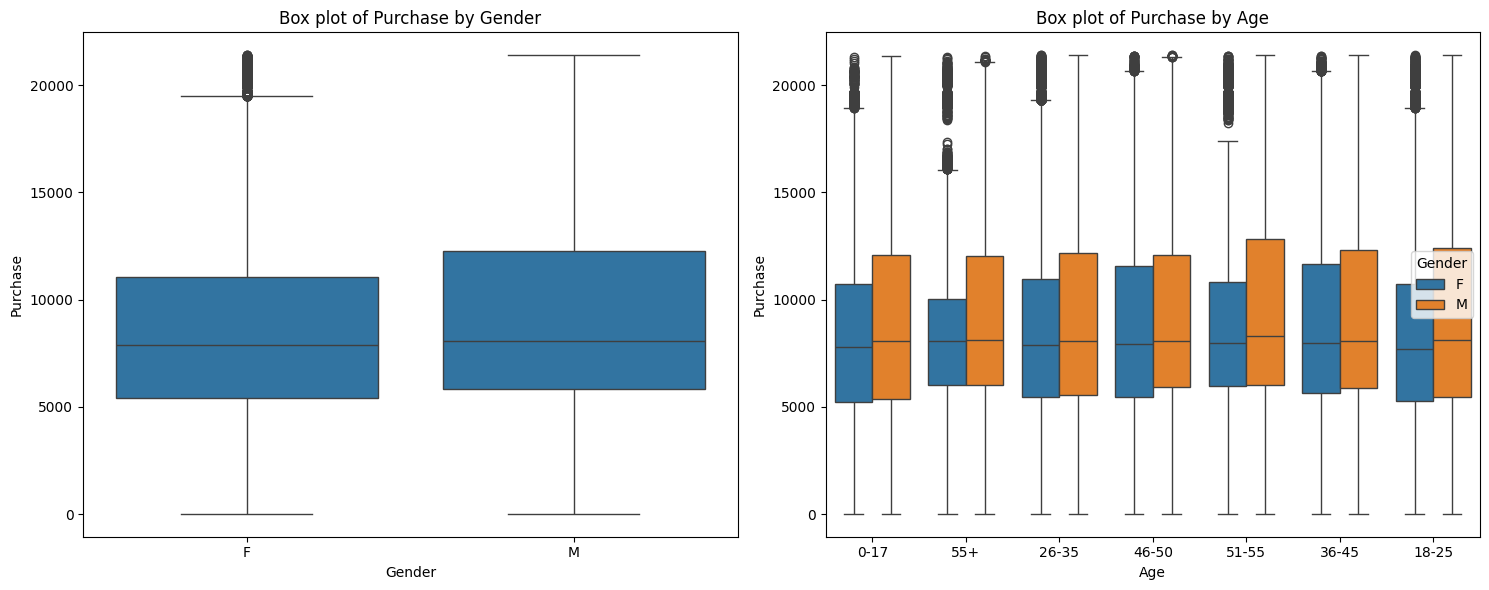

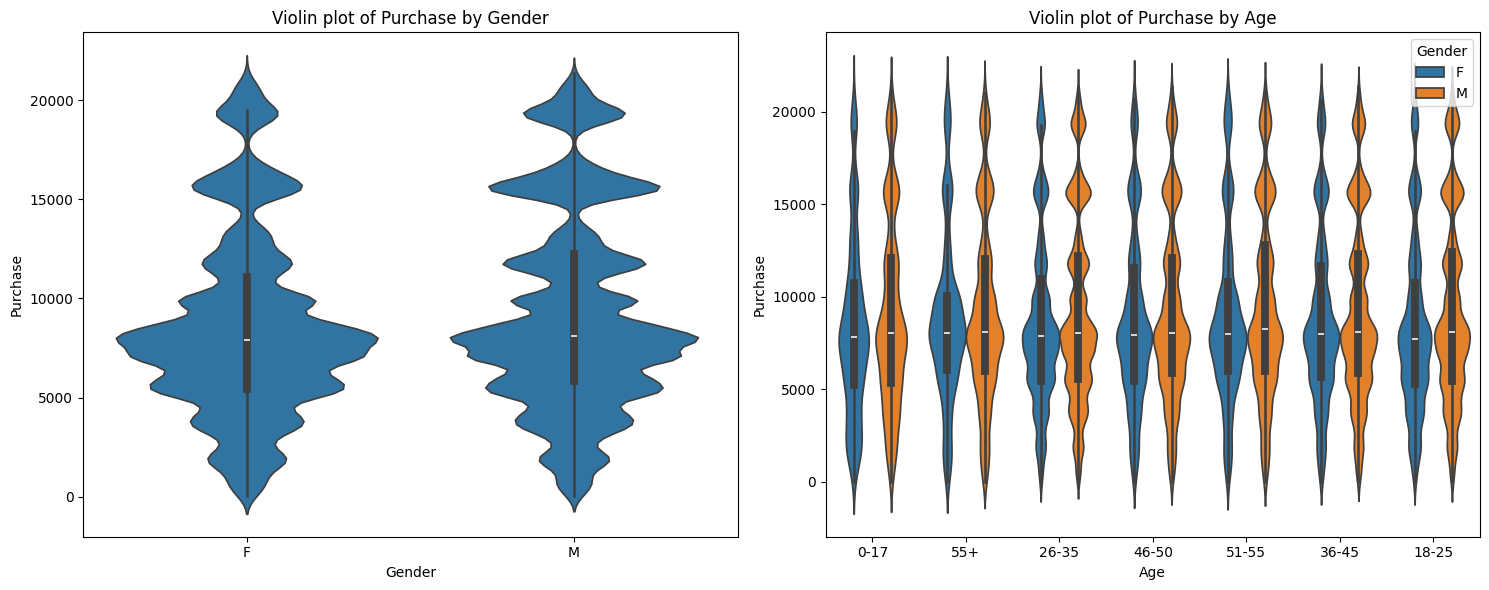

In [176]:
# Plot box plots to compare Purchase distributions across different categories
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.title('Box plot of Purchase by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Age', y='Purchase',hue='Gender')
plt.title('Box plot of Purchase by Age')

plt.tight_layout()
plt.show()

# Plot violin plots to compare Purchase distributions across different categories
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='Gender', y='Purchase')
plt.title('Violin plot of Purchase by Gender')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Age', y='Purchase',hue='Gender')
plt.title('Violin plot of Purchase by Age')

plt.tight_layout()
plt.show()


### Box Plot of Purchase by Gender
1. Median Purchase:
- The median purchase amount is similar for both females (F) and males (M), indicating that the typical spending amount is roughly the same for both genders.

2. Interquartile Range (IQR):
- The IQR (the range between the 25th and 75th percentiles) is also similar for both genders, showing that the central 50% of purchase amounts are distributed similarly.

3. Whiskers and Outliers:
- The whiskers extend to similar ranges for both genders, but there are more outliers in the male (M) category, suggesting that some males make significantly higher purchases.


### Box Plot of Purchase by Age (Separated by Gender)
1. Median Purchase:
- The median purchase amount varies across different age groups. Younger age groups (e.g., 0-17, 18-25) tend to have lower median purchases compared to middle age groups (e.g., 26-35, 36-45).
2. Gender Differences:
- Within each age group, the median purchase amounts for males (M) and females (F) are relatively similar. However, in some age groups, males show slightly higher median purchases (e.g., 26-35, 36-45).

3. Interquartile Range (IQR):
- The IQR is wider for some age groups, indicating more variability in purchase amounts. For example, the 26-35 age group shows a wider IQR compared to other age groups, suggesting more diverse spending behaviors.

4. Whiskers and Outliers:
- Most age groups show a significant number of outliers, indicating that there are individuals who make purchases that are much higher than the typical range. This is especially evident in the age groups 26-35 and 36-45.

### Recommendations
1. Target High-Value Customers:
- Develop targeted marketing strategies for males and middle-aged consumers (26-45) who are more likely to make high-value purchases.
        Offer loyalty programs or special promotions to incentivize these high-value customers.

2. Age-Specific Campaigns:
- Create age-specific campaigns to address the distinct spending behaviors observed. For instance, offer products or bundles that appeal specifically to middle-aged consumers who have higher spending capabilities.

### Violin Plot of Purchase by Gender and Violin Plot of Purchase by Age (Separated by Gender)
1. Overall Insights
A. Gender and Purchase Behavior:
- Both genders have similar median purchase amounts and density distributions, indicating similar spending behaviors overall. However, there are slight variations in the distribution shapes, suggesting nuanced differences in spending patterns.

B. Age and Purchase Behavior:
- Middle-aged consumers (26-35, 36-45) generally show higher median purchases and denser distributions at various purchase levels, indicating more significant spending compared to other age groups.
- Younger (0-17, 18-25) and older (55+) age groups tend to have lower median purchases and less dense distributions, indicating lower and more uniform spending patterns.

2. Recommendations
A. Target High-Value Customers:
- Focus marketing efforts on middle-aged consumers (26-45) who exhibit higher spending patterns. Tailor promotions and product offerings to this demographic to maximize sales.

B. Personalized Marketing:
- Use the nuanced differences in gender-based spending patterns to develop personalized marketing strategies. For example, promote high-value items to males in the 26-35 age group who tend to spend more.

C. Age-Specific Campaigns:
- Develop campaigns targeting specific age groups, such as discounts for younger consumers (0-25) to encourage higher spending and loyalty programs for middle-aged consumers who already exhibit higher spending behaviors.

D. Product Recommendations:
- Leverage insights on spending patterns to recommend products that align with the spending behaviors of different age groups. For example, suggest premium products to middle-aged customers and affordable options to younger customers.

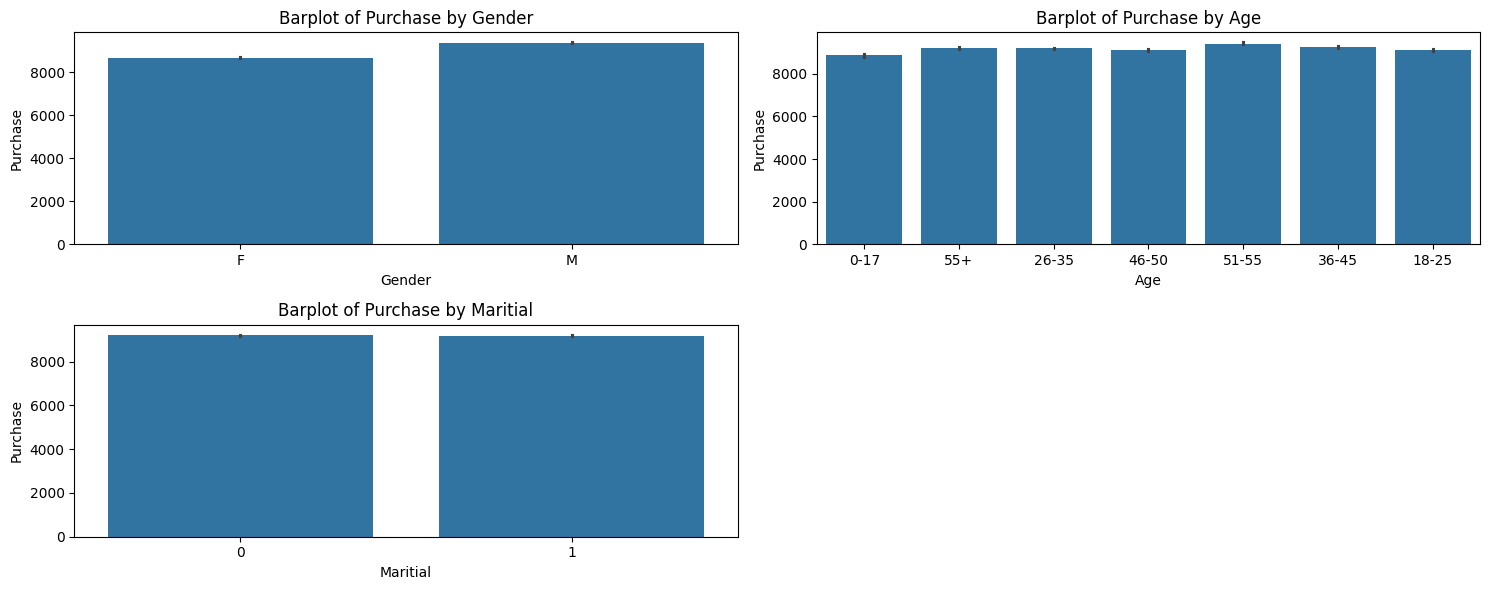

In [177]:
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
sns.barplot(data=df, x='Gender', y='Purchase')
plt.title('Barplot of Purchase by Gender')


plt.subplot(2, 2, 2)
sns.barplot(data=df, x='Age', y='Purchase')
plt.title('Barplot of Purchase by Age')

plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Maritial', y='Purchase')
plt.title('Barplot of Purchase by Maritial')

plt.tight_layout()

plt.show()

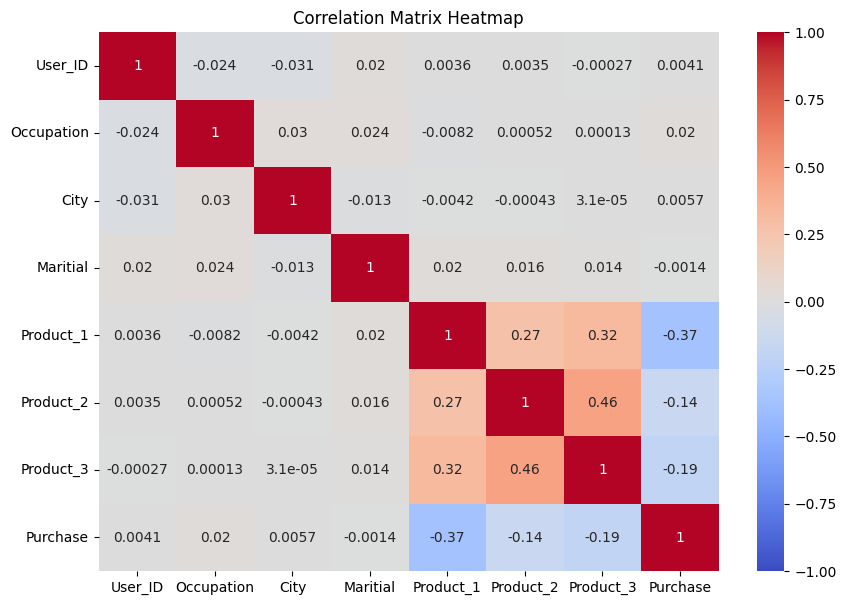

In [187]:
# Calculate the correlation matrix for continuous variables
continuous_columns = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns
correlation_matrix = df[continuous_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Heat Map 

The provided visualization is a heatmap showing the correlation matrix for different variables in the dataset. Correlation values range from -1 to 1, where:
- 1 indicates a perfect positive correlation.
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.

Interpretation of the Correlation Matrix Heatmap:

looking at heat map, i think heat map is not good for relation interpretation because even though other have int value, they act as categories

# Part 4: Multivariate Analysis

1. Pair Plot:
- Create a pair plot to explore relationships between multiple variables simultaneously.

2. Facet Grid:
- Use facet grids to visualize the relationship between Purchase and other variables across different subsets of data (e.g., Age and Gender).


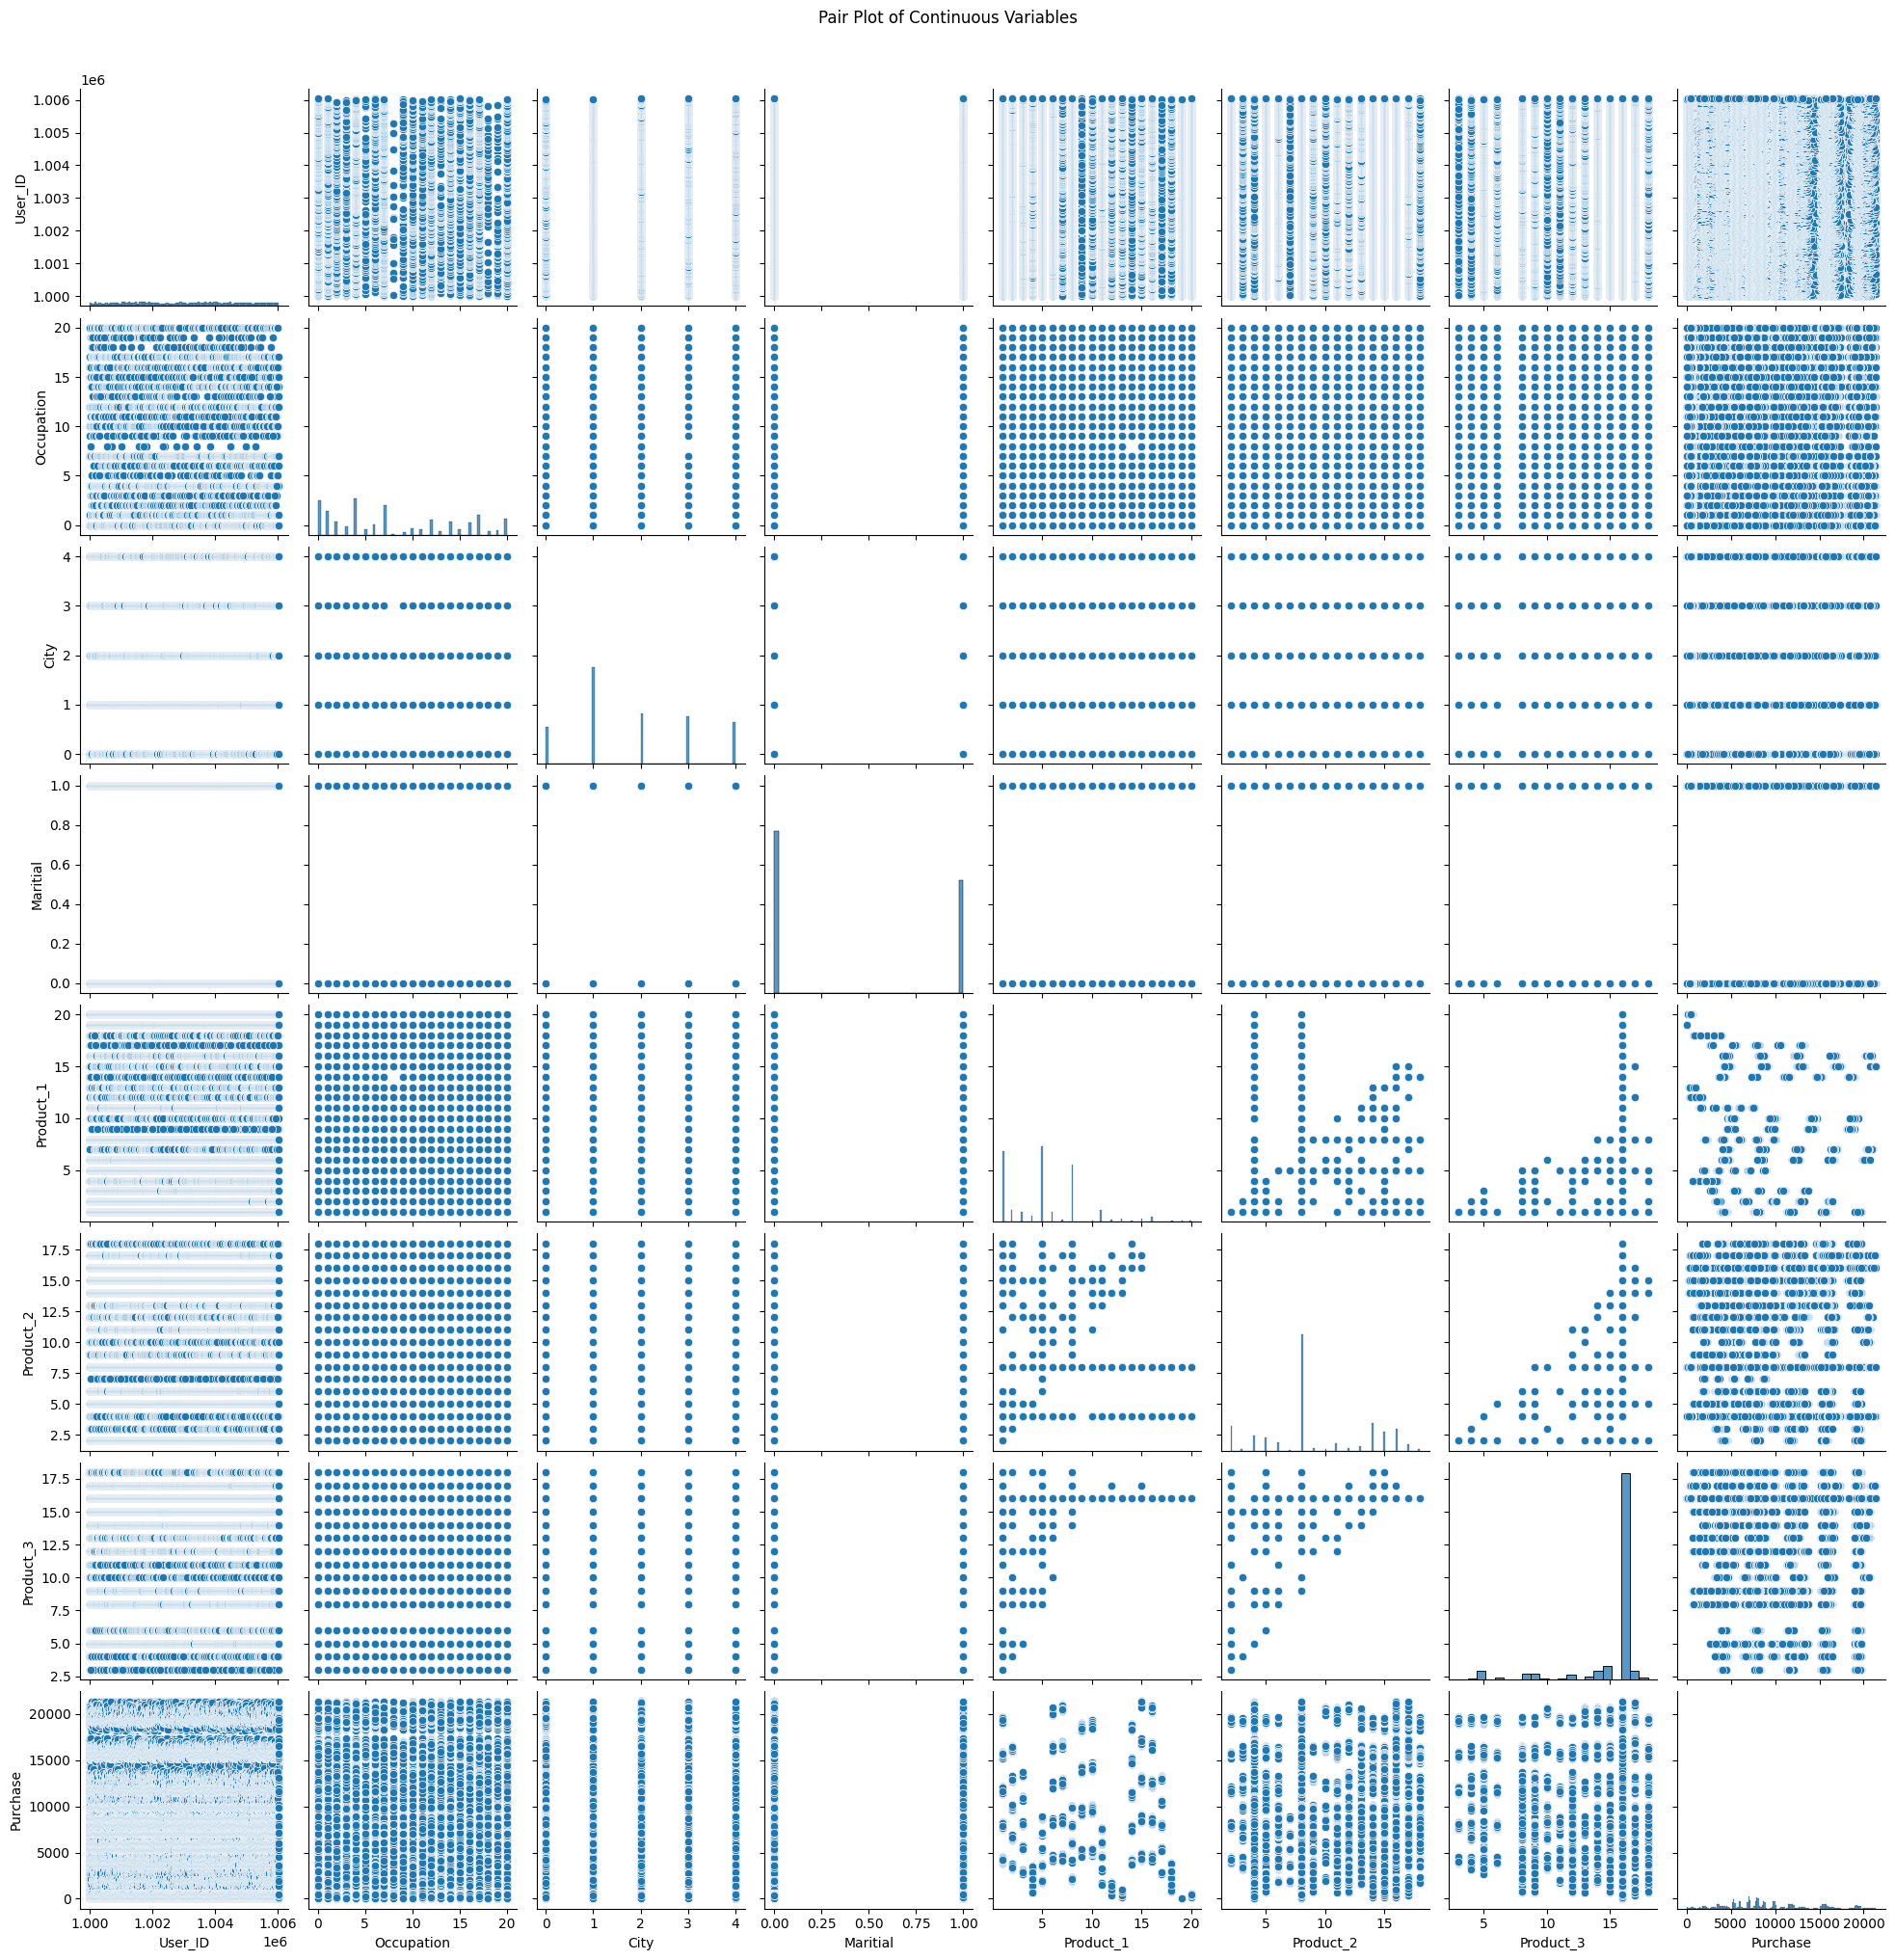

In [179]:
#creating a pair plot
# Select the continuous columns for the pair plot
continuous_columns = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32']).columns

# Create a pair plot
sns.pairplot(df[continuous_columns])
plt.suptitle('Pair Plot of Continuous Variables', y=1.02)
plt.show()

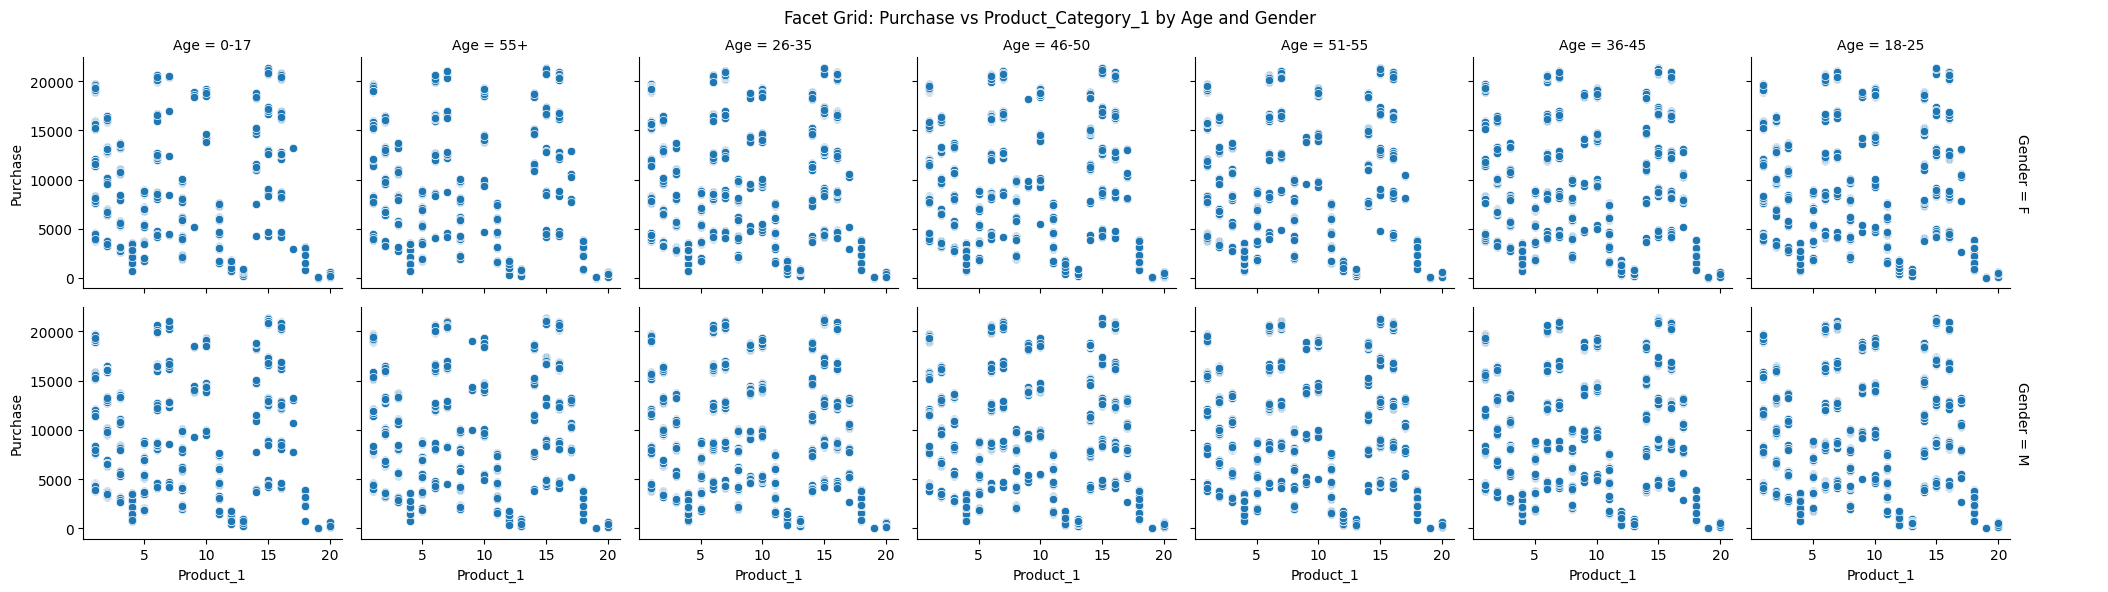

In [180]:
# Create a FacetGrid for visualizing the relationship between Purchase and Product_Category_1 across different subsets of data (e.g., Age and Gender)
g = sns.FacetGrid(df, col="Age", row="Gender", margin_titles=True)
g.map(sns.scatterplot, "Product_1", "Purchase")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid: Purchase vs Product_Category_1 by Age and Gender')
plt.show()


The provided visualization is a Facet Grid plot showing the relationship between Purchase and Product_Category_1 across different age groups and separated by gender. Each subplot represents a combination of an age group and gender, providing a detailed view of how these variables interact.
Interpretation of the Facet Grid
General Observations

Overall Distribution:
- The scatter plots show that purchases span a wide range of values across all age groups and genders.
        There is no single predominant purchase amount, indicating diverse spending behaviors.

Gender Comparison:
- Each row represents a gender, with the top row for females (F) and the bottom row for males (M).
- There are no stark differences between males and females in terms of purchase amounts within each age group, suggesting that gender does not heavily influence the purchase behavior within the same age group.

Age Group Analysis
- 0-17 Age Group: Purchases are generally lower compared to other age groups. Both genders show similar patterns with a concentration of lower purchase amounts.

- 18-25 Age Group: Slight increase in purchase amounts compared to the 0-17 age group. Distribution is still relatively spread out with no clear high-value purchases dominating.

- 26-35 Age Group: Noticeable increase in purchase amounts, with many high-value purchases. Both genders show similar distributions, with many purchases above 10,000.

- 36-45 Age Group: Similar to the 26-35 age group, showing high purchase amounts.
        Slightly more variation in purchases for males.

- 46-50 Age Group: Consistent with the middle age groups, showing high purchase amounts. Both genders have a wide spread of purchase amounts.

- 51-55 Age Group: Maintains high purchase amounts similar to the previous age groups.
        

- 55+ Age Group: Slight decrease in high purchase amounts compared to the 26-55 age groups.
        

Insights
- High Spending Age Groups: Middle-aged consumers (26-55) show higher purchase amounts, indicating stronger spending power. Younger (0-25) and older (55+) age groups tend to have lower purchase amounts.

- Gender Influence: Gender does not significantly influence purchase amounts within the same age group, suggesting that age is a more critical factor in spending behavior.

Recommendations

-Target Middle-Aged Consumers: Develop marketing campaigns targeting middle-aged consumers (26-55) who exhibit higher spending behaviors. Tailor product offerings and promotions to this demographic.

- Age-Specific Strategies: Create age-specific marketing strategies to engage younger and older consumers. For younger consumers, consider offering more affordable options and incentives to increase spending. For older consumers, emphasize product value and benefits.



# Part 5: Advanced Visualizations
1. 3D Scatter Plot:
- Create a 3D scatter plot to visualize the relationship between three continuous variables.

2. Density Plot:
- Plot density plots to understand the distribution of Purchases for different categories.

3. Parallel Coordinates Plot:
- Use parallel coordinates to visualize multi-dimensional data and compare different categories.


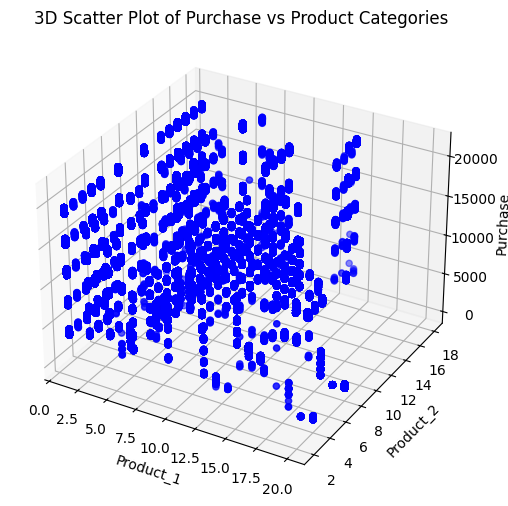

In [188]:
# Create a 3D scatter plot for three continuous variables
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Variables for the 3D scatter plot
x = df['Product_1']
y = df['Product_2']
z = df['Purchase']

# Plotting the scatter plot
ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('Product_1')
ax.set_ylabel('Product_2')
ax.set_zlabel('Purchase')
plt.title('3D Scatter Plot of Purchase vs Product Categories')
plt.show()


The provided visualization is a 3D scatter plot showing the relationship between Purchase, Product_Category_1, and Product_Category_2. Each axis represents one of these variables, and the points represent individual data entries.
Insights
- Diverse Spending: The wide range of purchase values across different product categories indicates that customers have diverse spending patterns and preferences.

- High-Value Purchases: The presence of high-value purchases across various product categories indicates potential opportunities for promoting premium products or offering high-value bundles.

Recommendations
- Target High-Value Customers: Develop targeted marketing campaigns for high-value customers who make larger purchases. Offer personalized promotions and rewards to encourage repeat high-value purchases.


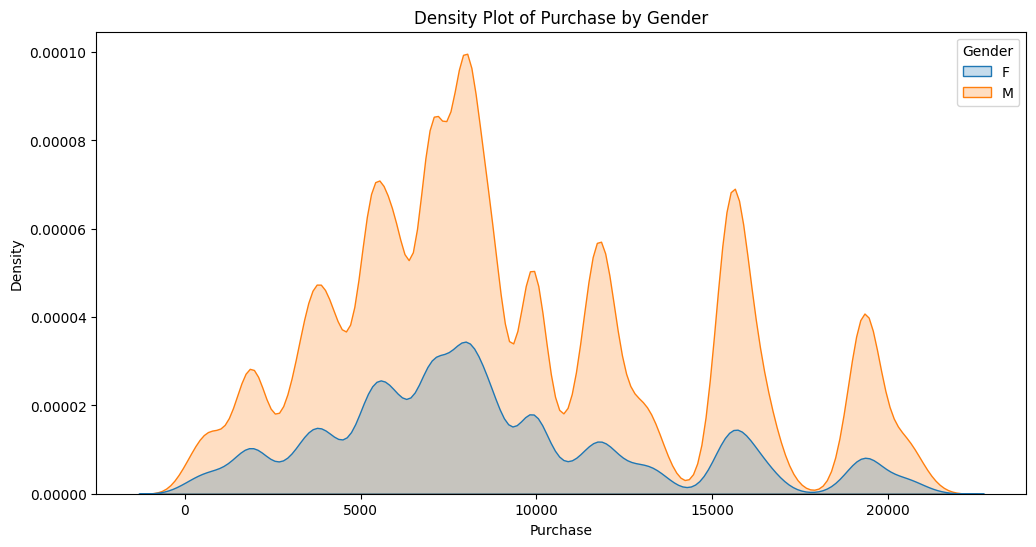

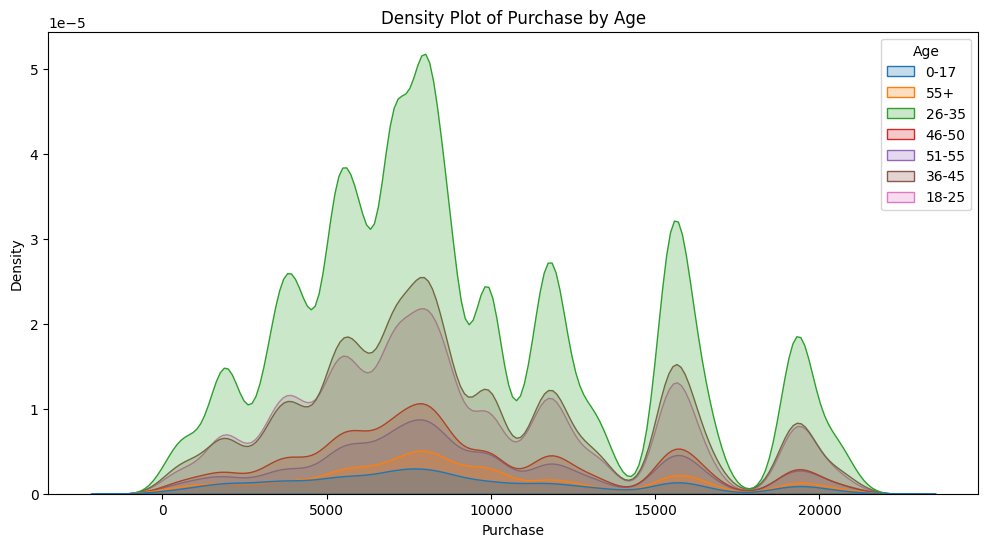

In [182]:
# Density plot for 'Purchase' by 'Gender'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Purchase', hue='Gender', fill=True)
plt.title('Density Plot of Purchase by Gender')
plt.xlabel('Purchase')
plt.ylabel('Density')
plt.show()

# Density plot for 'Purchase' by 'Age'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Purchase', hue='Age', fill=True)
plt.title('Density Plot of Purchase by Age')
plt.xlabel('Purchase')
plt.ylabel('Density')
plt.show()


### Density Plot of Purchase by Gender

The provided visualization is a density plot showing the distribution of Purchase amounts by gender. The plot uses kernel density estimation (KDE) to smooth the distribution and visualize the frequency of different purchase amounts for both females (F) and males (M).

Overall Distribution:
- The density plot shows the smoothed distribution of purchase amounts for both genders.
    The x-axis represents the purchase amounts, while the y-axis represents the density, indicating the relative frequency of each purchase amount.

Multiple Peaks:
- Both genders exhibit multiple peaks in their purchase distributions, indicating several common purchase amounts.

Gender-Specific Observations
- Female (F) Purchases: The density distribution for females is represented by the blue area. Females tend to have a smoother and more spread-out distribution of purchase amounts compared to males.

- Male (M) Purchases: The density distribution for males is represented by the orange area. The distribution also shows multiple peaks, with prominent peaks around 5,000, 10,000, and 15,000. Males exhibit higher density at several purchase amounts compared to females, indicating a higher frequency of purchases at these amounts.

Recommendation:
- Targeted Marketing: The peaks in the male purchase distribution suggest specific price points where males are more likely to spend. Marketing strategies could focus on these key price points to maximize engagement and sales. For females, the more spread-out distribution indicates that a broader range of price points should be targeted in marketing campaigns.

- Product Offerings: High-density purchase amounts can guide product pricing strategies. For example, ensuring that popular products are available at the 5,000, 10,000, and 15,000 price points for males could drive higher sales.

### Density Plot of Purchase by Age
The provided visualization is a density plot showing the distribution of Purchase amounts by different age groups. The plot uses kernel density estimation (KDE) to smooth the distribution and visualize the frequency of different purchase amounts for each age group.

- Overall Distribution: The density plot shows the smoothed distribution of purchase amounts across different age groups. The x-axis represents the purchase amounts, while the y-axis represents the density, indicating the relative frequency of each purchase amount.

- Multiple Peaks: The plot exhibits multiple peaks, indicating several common purchase amounts across different age groups.

Recommendations:

1. Target High-Value Customers: Focus marketing efforts on the 26-35 age group, which exhibits the highest spending behavior. Tailor product offerings and promotions to this demographic to maximize sales.

2. Age-Specific Campaigns: Develop age-specific marketing strategies to engage different age groups effectively. For example, offer more affordable options and incentives for younger consumers (0-25) to increase their spending. Create loyalty programs and exclusive offers for the 36-45 and 46-50 age groups to encourage repeat purchases.

In [183]:
# # Parallel coordinates plot for continuous variables and categorical color encoding
# from mpl_toolkits.mplot3d import Axes3D
# from pandas.plotting import parallel_coordinates
# plt.figure(figsize=(15, 8))
# parallel_coordinates(df[['Purchase', 'Gender']], 'Gender', colormap=plt.get_cmap("Set1"))
# plt.title('Parallel Coordinates Plot')
# plt.xlabel('Variables')
# plt.ylabel('Values')
# plt.show()


# Part 6: Insights and Recommendations
1. Insights:
- Based on the visualizations and analysis, summarize the key insights.
- Identify patterns and trends in consumer behaviour during Black Friday sales.

2. Recommendations:
- Provide actionable recommendations for stakeholders (e.g., marketing strategies, inventory management).
